In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [31]:
data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
x=data.drop(['Outcome'],axis=1)
y=data['Outcome']
print(x.shape)
print(y.shape)

(795, 8)
(795,)


In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=5)

In [34]:
clf = LogisticRegression()

In [35]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
115,15,136,70,32,110,37.1,0.153,43
773,1,147,94,41,0,49.3,0.358,27
189,0,114,80,34,285,44.2,0.167,27
116,1,107,68,19,0,26.5,0.165,24
326,8,112,72,0,0,23.6,0.840,58


In [36]:
y_train.head()

115    1
773    1
189    0
116    0
326    0
Name: Outcome, dtype: int64

In [37]:
model = clf.fit(x_train, y_train)

C:\Users\alekh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
new_observation = [[15,136,70,32,110,37.1,0.153,43]]

In [39]:
model.predict(new_observation)

array([1], dtype=int64)

In [40]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
342,2,112,68,22,94,34.1,0.315,26
469,4,117,64,27,120,33.2,0.230,24
595,4,154,72,29,126,31.3,0.338,37
347,4,129,60,12,231,27.5,0.527,31
646,0,119,0,0,0,32.4,0.141,24
134,4,144,58,28,140,29.5,0.287,37
792,5,121,72,23,112,26.2,0.245,30
84,0,100,88,60,110,46.8,0.962,31
481,2,100,54,28,105,37.8,0.498,24
28,1,85,66,29,0,26.6,0.351,31


In [41]:
y_test

342    0
469    0
595    0
347    0
646    1
134    0
792    0
84     0
481    0
28     0
329    0
504    0
293    1
126    1
760    0
427    1
12     0
470    1
578    0
630    1
148    0
554    0
360    0
230    0
369    0
767    1
650    0
488    0
196    0
247    1
      ..
75     1
219    1
222    1
417    0
765    0
450    0
510    0
4      1
282    1
458    0
424    1
248    1
15     1
456    1
522    0
93     1
395    0
56     0
370    0
461    0
34     0
680    0
170    1
696    0
186    1
492    0
85     0
518    0
479    0
626    0
Name: Outcome, Length: 318, dtype: int64

In [42]:
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.7704402515723271

In [43]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [44]:
fpr,tpr,thresholds=roc_curve(y_test,model.predict_proba(x_test)[:,1])

In [45]:
fpr

array([0.        , 0.        , 0.        , 0.00469484, 0.00469484,
       0.00938967, 0.00938967, 0.01877934, 0.01877934, 0.02347418,
       0.02347418, 0.02816901, 0.02816901, 0.03286385, 0.03286385,
       0.04225352, 0.04225352, 0.04694836, 0.04694836, 0.05164319,
       0.05164319, 0.05633803, 0.05633803, 0.0657277 , 0.0657277 ,
       0.07042254, 0.07042254, 0.07981221, 0.07981221, 0.08450704,
       0.08450704, 0.08450704, 0.08920188, 0.08920188, 0.10328638,
       0.10328638, 0.10798122, 0.10798122, 0.11267606, 0.11267606,
       0.12206573, 0.12206573, 0.13615023, 0.13615023, 0.15023474,
       0.15023474, 0.15962441, 0.15962441, 0.16431925, 0.16431925,
       0.16431925, 0.16901408, 0.16901408, 0.17840376, 0.17840376,
       0.18779343, 0.18779343, 0.19248826, 0.19248826, 0.20187793,
       0.20187793, 0.22535211, 0.22535211, 0.2629108 , 0.2629108 ,
       0.26760563, 0.26760563, 0.29107981, 0.29107981, 0.30046948,
       0.30046948, 0.30516432, 0.30516432, 0.36150235, 0.36150

In [46]:
tpr

array([0.        , 0.00952381, 0.05714286, 0.05714286, 0.08571429,
       0.08571429, 0.21904762, 0.21904762, 0.22857143, 0.22857143,
       0.23809524, 0.23809524, 0.24761905, 0.24761905, 0.26666667,
       0.26666667, 0.3047619 , 0.3047619 , 0.34285714, 0.34285714,
       0.36190476, 0.36190476, 0.4       , 0.4       , 0.40952381,
       0.40952381, 0.46666667, 0.46666667, 0.48571429, 0.48571429,
       0.5047619 , 0.52380952, 0.52380952, 0.56190476, 0.56190476,
       0.57142857, 0.57142857, 0.58095238, 0.58095238, 0.59047619,
       0.59047619, 0.6       , 0.6       , 0.60952381, 0.60952381,
       0.61904762, 0.61904762, 0.66666667, 0.66666667, 0.68571429,
       0.7047619 , 0.7047619 , 0.71428571, 0.71428571, 0.72380952,
       0.72380952, 0.73333333, 0.73333333, 0.74285714, 0.74285714,
       0.75238095, 0.75238095, 0.78095238, 0.78095238, 0.79047619,
       0.79047619, 0.8       , 0.8       , 0.80952381, 0.80952381,
       0.81904762, 0.81904762, 0.82857143, 0.82857143, 0.83809

In [47]:
thresholds

array([1.94861995, 0.94861995, 0.88393175, 0.88052598, 0.86695039,
       0.86061885, 0.75725444, 0.75043534, 0.73933366, 0.73467093,
       0.73386084, 0.72950424, 0.72947903, 0.72780488, 0.72302554,
       0.70639639, 0.6937667 , 0.69045337, 0.67790635, 0.6771065 ,
       0.67398234, 0.67327613, 0.65811416, 0.6535856 , 0.64757507,
       0.64058867, 0.61311735, 0.59578271, 0.59436086, 0.5926401 ,
       0.58525091, 0.57374171, 0.5733593 , 0.5577724 , 0.55038259,
       0.54603873, 0.54325138, 0.5425568 , 0.52991253, 0.52454715,
       0.51859957, 0.51857421, 0.51262051, 0.50684954, 0.50089396,
       0.49503001, 0.47438018, 0.4596755 , 0.45330553, 0.45007127,
       0.44986667, 0.4457552 , 0.44279953, 0.43490816, 0.43450806,
       0.43058597, 0.42819433, 0.42776608, 0.4206964 , 0.41583081,
       0.41471372, 0.38546769, 0.38167564, 0.37031855, 0.36992974,
       0.36555617, 0.36513061, 0.35616404, 0.35585892, 0.35206005,
       0.35158185, 0.3497699 , 0.34433566, 0.32696223, 0.32374

In [48]:
logit_roc_auc1=roc_auc_score(y_test,clf.predict(x_test))

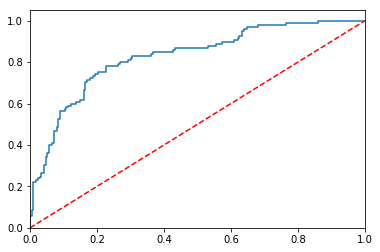

In [49]:
plt.figure()
plt.plot(fpr,tpr,label="Logistic Regression Sensitivity=%0.3f" %logit_roc_auc1)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.show()